In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
os.chdir(r'C:\Users\SAURABH\Desktop\MSBA\Personal Projects\Titanic Survival Prediction\titanic')
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dropping the unnecessary columns

In [9]:
train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
test.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


Looking for Null values & imputing them

In [128]:
print(train.isnull().sum())

Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_encoded    0
dtype: int64


In [130]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_encoded    0
dtype: int64


Using Median Imputation for the 'Age' column

In [21]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_39328\3278935906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\SAURABH\AppData\Local\Temp\ipykernel_39328\3278935906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Using Median Imputation on the 'Fare' column in the test set

In [24]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_39328\3907505379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [26]:
print(train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [28]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Encoding the categorical & non-numerical variables

In [31]:
train['Sex_encoded'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex_encoded'] = test['Sex'].map({'male': 1, 'female': 0})

In [33]:
train.drop(columns = ['Sex'], inplace = True)
test.drop(columns = ['Sex'], inplace = True)

Using One-hot Encoding for the 'Embarked' column

In [36]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

C:\Users\SAURABH\AppData\Local\Temp\ipykernel_39328\2290010007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
C:\Users\SAURABH\AppData\Local\Temp\ipykernel_39328\2290010007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [38]:
train_encoded = pd.get_dummies(train, columns = ['Embarked'], prefix = 'Embarked', dummy_na = True)
test_encoded = pd.get_dummies(test, columns = ['Embarked'], prefix = 'Embarked', dummy_na = True)

In [40]:
train_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,7.2500,1,False,False,True,False
1,1,1,38.0,1,0,71.2833,0,True,False,False,False
2,1,3,26.0,0,0,7.9250,0,False,False,True,False
3,1,1,35.0,1,0,53.1000,0,False,False,True,False
4,0,3,35.0,0,0,8.0500,1,False,False,True,False


Converting the One-hot Encoding outputs to Binary

In [43]:
train_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']] = train_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].astype(int)
test_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']] = test_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].astype(int)

In [45]:
train_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,0


In [47]:
test_encoded.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,892,3,34.5,0,0,7.8292,1,0,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,0,1,0


Now that the missing data & categorical variables have been taken care of we can check if any of the numerical variables are skewed & deal with them.

In [76]:
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

In [79]:
train_encoded[numeric_cols].skew()

Age      0.510245
SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

In [81]:
test_encoded[numeric_cols].skew()

Age      0.660747
SibSp    4.168337
Parch    4.654462
Fare     3.692299
dtype: float64

Based on the results, we can see that the variables - SibSp, Parch & Fare are heavily skewed in both the train & test datasets. These need to be taken care of before we proceed any further. We can do that by using log transformation to the skewed variables.

In [86]:
train_encoded_trans = train_encoded.assign(
    log_SibSp = lambda x: np.log1p(x['SibSp']),
    log_Parch = lambda x: np.log1p(x['Parch']),
    log_Fare = lambda x: np.log1p(x['Fare'])
)

In [88]:
test_encoded_trans = test_encoded.assign(
    log_SibSp = lambda x: np.log1p(x['SibSp']),
    log_Parch = lambda x: np.log1p(x['Parch']),
    log_Fare = lambda x: np.log1p(x['Fare'])
)

In [90]:
train_encoded_trans.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,log_SibSp,log_Parch,log_Fare
0,0,3,22.0,1,0,7.2500,1,0,0,1,0,0.693147,0.0,2.110213
1,1,1,38.0,1,0,71.2833,0,1,0,0,0,0.693147,0.0,4.280593
2,1,3,26.0,0,0,7.9250,0,0,0,1,0,0.000000,0.0,2.188856
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,0.693147,0.0,3.990834
4,0,3,35.0,0,0,8.0500,1,0,0,1,0,0.000000,0.0,2.202765


In [92]:
test_encoded_trans.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,log_SibSp,log_Parch,log_Fare
0,892,3,34.5,0,0,7.8292,1,0,1,0,0,0.000000,0.000000,2.178064
1,893,3,47.0,1,0,7.0000,0,0,0,1,0,0.693147,0.000000,2.079442
2,894,2,62.0,0,0,9.6875,1,0,1,0,0,0.000000,0.000000,2.369075
3,895,3,27.0,0,0,8.6625,1,0,0,1,0,0.000000,0.000000,2.268252
4,896,3,22.0,1,1,12.2875,0,0,0,1,0,0.693147,0.693147,2.586824


Now that we have Log-transformed the skewed variables, we can proceed to normalizing the data using StandardScaler

In [97]:
trans_numeric_cols = ['Age', 'log_SibSp', 'log_Parch', 'log_Fare']
categorical_cols_train = ['Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_encoded', 'Survived']
categorical_cols_test = ['Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_encoded']

In [99]:
scaler_train = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), trans_numeric_cols),
        ('cat', 'passthrough', categorical_cols_train)
    ])

In [101]:
scaler_test = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), trans_numeric_cols),
        ('cat', 'passthrough', categorical_cols_test)
    ])

In [105]:
train_encoded_scaled = scaler_train.fit_transform(train_encoded_trans)
test_encoded_scaled = scaler_test.fit_transform(test_encoded_trans)

In [107]:
train_encoded_scaled_df = pd.DataFrame(
    train_encoded_scaled,
    columns=scaler_train.get_feature_names_out()
)

In [109]:
test_encoded_scaled_df = pd.DataFrame(
    test_encoded_scaled,
    columns=scaler_test.get_feature_names_out()
)

In [111]:
train_encoded_scaled_df.head()

,num__Age,num__log_SibSp,num__log_Parch,num__log_Fare,cat__Pclass,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_encoded,cat__Survived
0,-0.565736,0.889164,-0.52906,-0.879741,3.0,0.0,0.0,1.0,1.0,0.0
1,0.663861,0.889164,-0.52906,1.361220,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.258337,-0.609279,-0.52906,-0.798540,3.0,0.0,0.0,1.0,0.0,1.0
3,0.433312,0.889164,-0.52906,1.062038,1.0,0.0,0.0,1.0,0.0,1.0
4,0.433312,-0.609279,-0.52906,-0.784179,3.0,0.0,0.0,1.0,1.0,0.0


In [113]:
test_encoded_scaled_df.head()

,num__Age,num__log_SibSp,num__log_Parch,num__log_Fare,cat__Pclass,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_encoded
0,0.386231,-0.633681,-0.497692,-0.867031,3.0,0.0,1.0,0.0,1.0
1,1.371370,1.038512,-0.497692,-0.969149,3.0,0.0,0.0,1.0,0.0
2,2.553537,-0.633681,-0.497692,-0.669252,2.0,0.0,1.0,0.0,1.0
3,-0.204852,-0.633681,-0.497692,-0.773647,3.0,0.0,0.0,1.0,1.0
4,-0.598908,1.038512,1.140590,-0.443786,3.0,0.0,0.0,1.0,0.0


Now that all the preprocessing tasks are done, we can proceed with testing out different classifiers

In [116]:
train_1 = train_encoded_scaled_df.copy()
train_1.head()

,num__Age,num__log_SibSp,num__log_Parch,num__log_Fare,cat__Pclass,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_encoded,cat__Survived
0,-0.565736,0.889164,-0.52906,-0.879741,3.0,0.0,0.0,1.0,1.0,0.0
1,0.663861,0.889164,-0.52906,1.361220,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.258337,-0.609279,-0.52906,-0.798540,3.0,0.0,0.0,1.0,0.0,1.0
3,0.433312,0.889164,-0.52906,1.062038,1.0,0.0,0.0,1.0,0.0,1.0
4,0.433312,-0.609279,-0.52906,-0.784179,3.0,0.0,0.0,1.0,1.0,0.0


Our dataset is now ready for parsing through to make predictions. I will be using all the well-known classifiers for predictive modeling namely - Decision Trees, Random Forests, K-nearest neighbors & Logistic Regression. I will then select the model with the highest accuracy score.

1. Decision Tree Classifier

In [146]:
X = train_1.drop('cat__Survived', axis = 1)
y = train_1['cat__Survived']

Full Tree Depth with Gini as the criterion

In [148]:
full_tree = DecisionTreeClassifier(criterion = 'gini')
full_tree.fit(X, y)
print(f'Tree Depth: {full_tree.get_depth()}')

Tree Depth: 21


Let's also visualize the decision tree

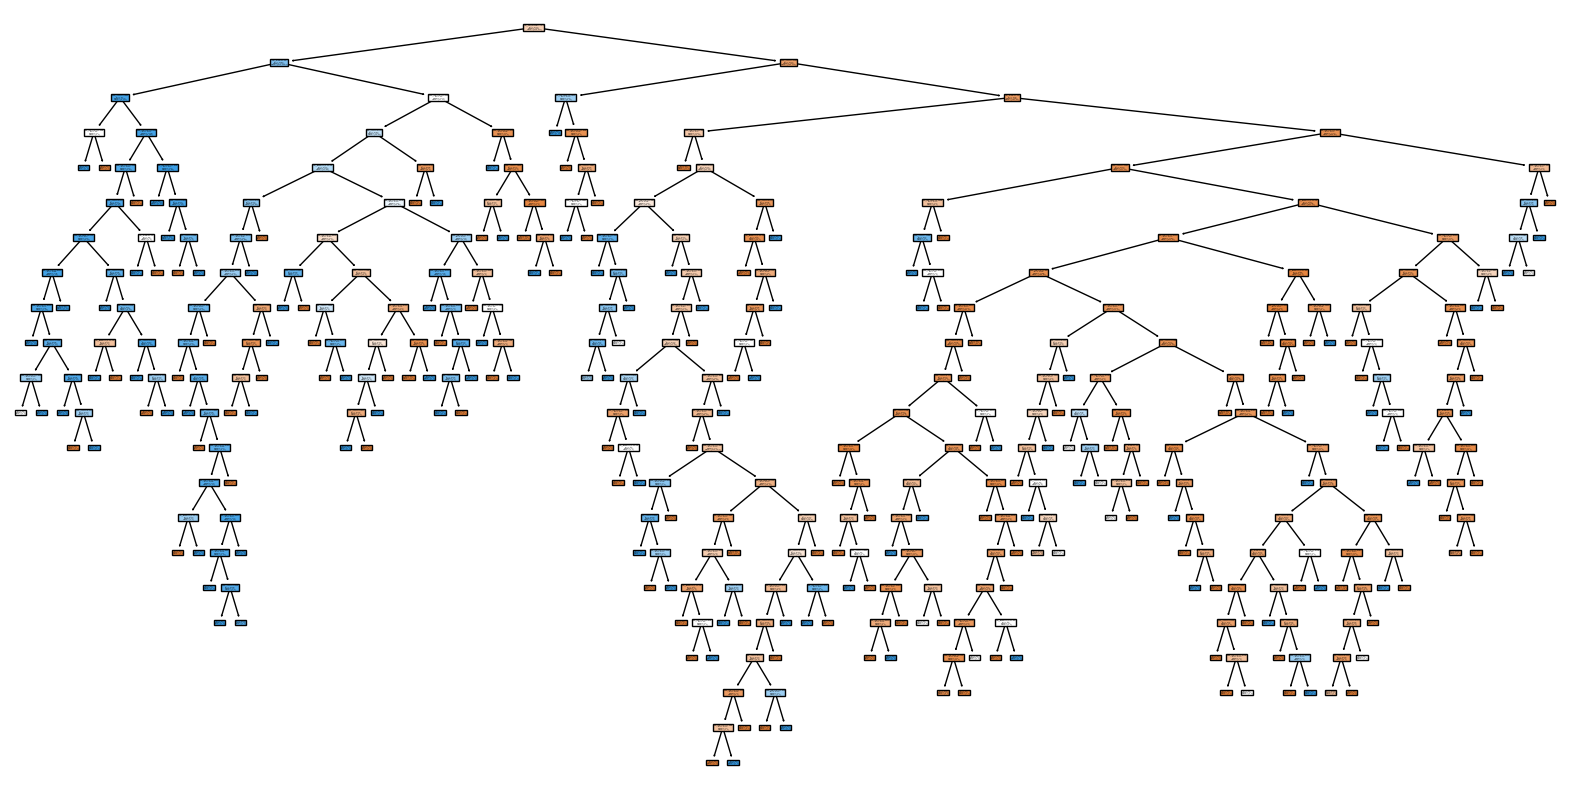

In [150]:
plt.figure(figsize=(20, 10))
plot_tree(full_tree, feature_names = X.columns, filled = True)
plt.show()

Now, we can figure out the best depth for the tree

In [152]:
par_grid_best = {'max_depth': np.arange(2, 20)}
grid_best = GridSearchCV(DecisionTreeClassifier(criterion = 'gini'), par_grid_best, cv=10)
grid_best.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [154]:
best_depth = grid_best.best_params_['max_depth']
print(f'Best Depth: {best_depth}, Accuracy: {grid_best.best_score_: .3f}')

Best Depth: 7, Accuracy:  0.822


So, with the Decision Tree Classifier we get the best depth as 7 & the accuracy of the classifier is 82.2%.

2. Random Forest Classifier

In [157]:
rand_for_grid = {'max_depth': np.arange(2, 20)}
rand_for_100 = GridSearchCV(RandomForestClassifier(n_estimators=100), rand_for_grid, cv = 100)
rand_for_100.fit(X, y)

GridSearchCV(cv=100, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [159]:
results_100 = rand_for_100.cv_results_
results_100

{'mean_fit_time': array([0.09349466, 0.09715533, 0.10071615, 0.10264034, 0.10595748,
        0.10886172, 0.11416812, 0.1174404 , 0.11685073, 0.11866057,
        0.11935453, 0.12084129, 0.12162143, 0.12211174, 0.12210445,
        0.12197496, 0.12277191, 0.12362198]),
 'std_fit_time': array([0.00366249, 0.0038132 , 0.00187499, 0.00120117, 0.0014022 ,
        0.00146675, 0.00580531, 0.00540881, 0.00187869, 0.00254087,
        0.00112799, 0.0019889 , 0.00138661, 0.00143328, 0.00123662,
        0.00093456, 0.00156652, 0.00330552]),
 'mean_score_time': array([0.00388088, 0.00399088, 0.0039909 , 0.00394084, 0.00405105,
        0.00405097, 0.00425115, 0.00427106, 0.00425065, 0.00413119,
        0.004121  , 0.00414097, 0.00416109, 0.00419093, 0.0041921 ,
        0.00417976, 0.00418095, 0.00421111]),
 'std_score_time': array([0.00047516, 0.00038733, 0.00030015, 0.00036942, 0.00038415,
        0.00038414, 0.00065412, 0.00063037, 0.00080493, 0.00039122,
        0.00043104, 0.00040062, 0.00036699, 

In [161]:
print(f"Best Depth: {rand_for_100.best_params_['max_depth']}")
print(f"Best Accuracy: {rand_for_100.best_score_:.3f}")

Best Depth: 11
Best Accuracy: 0.834


So, with the Random Forest Classifier we get the best depth as 8 & the accuracy of the classifier is 83.4%

3. K-Nearest Neighbours Classifier

In [164]:
knn_par_grid = {'n_neighbors': np.arange(2, 20)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_par_grid, cv = 10)
knn_grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [166]:
results_knn = knn_grid.cv_results_
results_knn

{'mean_fit_time': array([0.00210028, 0.00180063, 0.00170052, 0.00190086, 0.00170052,
        0.00180044, 0.00180054, 0.0017004 , 0.00160046, 0.00180058,
        0.00160041, 0.0018003 , 0.0017009 , 0.00160058, 0.00170066,
        0.00140042, 0.00180056, 0.00190065]),
 'std_fit_time': array([0.00069958, 0.00040017, 0.00045839, 0.00053902, 0.00045844,
        0.00040014, 0.00040001, 0.00045836, 0.00049009, 0.00040015,
        0.0004901 , 0.00040007, 0.00045869, 0.00049004, 0.00045848,
        0.00049002, 0.00040014, 0.00029976]),
 'mean_score_time': array([0.00540168, 0.0046011 , 0.00490117, 0.00490088, 0.00480101,
        0.00460119, 0.00450108, 0.00470121, 0.0048012 , 0.00480101,
        0.00490129, 0.00480137, 0.00490077, 0.00500116, 0.00510108,
        0.00520179, 0.00520103, 0.00520122]),
 'std_score_time': array([0.00048944, 0.00048986, 0.00030009, 0.00029984, 0.00040029,
        0.00048989, 0.00050013, 0.00045841, 0.00040015, 0.00040017,
        0.00053865, 0.00040017, 0.00029996, 

In [168]:
print(f"Best k-value: {knn_grid.best_params_['n_neighbors']}")
print(f"Best Accuracy: {knn_grid.best_score_:.3f}")

Best k-value: 5
Best Accuracy: 0.811


So, the best k-value for the K-Nearest Neighbors Classifier is 3 & the accuracy of the classifier is 81.1%

4. Logistic Regression

In [173]:
reg_model = LogisticRegression()
cv_scores = cross_val_score(reg_model, X, y, cv = 10)
print(f'Mean CV Accuracy from Logistic Regression: {np.mean(cv_scores): .3f}')

Mean CV Accuracy from Logistic Regression:  0.788


So, the Mean CV Accuracy for Logistic Regression comes out to be 78.8%

Summarizing the accuracies for all the models -

In [176]:
print(f'Accuracy from Decision Tree Classifier: {grid_best.best_score_: .3f}')
print(f'Accuracy from Random Forests Classifier: {rand_for_100.best_score_:.3f}')
print(f'Accuracy from K-Nearest Neighbour Classifier: {knn_grid.best_score_:.3f}')
print(f'Accuracy from Logistic Regression: {np.mean(cv_scores): .3f}')

Accuracy from Decision Tree Classifier:  0.822
Accuracy from Random Forests Classifier: 0.834
Accuracy from K-Nearest Neighbour Classifier: 0.811
Accuracy from Logistic Regression:  0.788


Hence, we can clearly see that the Random Forest Classifier produces the best accuracy score for the dataset

Building the final model based on the Random Forest Classifier & Calculating the accuracy score for the same

In [178]:
final_model = RandomForestClassifier(n_estimators = 100, max_depth = rand_for_100.best_params_['max_depth'])
final_model.fit(X, y)

RandomForestClassifier(max_depth=11)

In [300]:
print(final_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [180]:
train_acc = accuracy_score(y, final_model.predict(X))
train_acc

0.9494949494949495

We get an accuracy of 94.94%

Now that we have decided on the model, let's fit the model on the test set & get the predictions on the survivability of the passengers

In [183]:
test_1 = test_encoded_scaled_df.copy()
test_1.head()

,num__Age,num__log_SibSp,num__log_Parch,num__log_Fare,cat__Pclass,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Sex_encoded
0,0.386231,-0.633681,-0.497692,-0.867031,3.0,0.0,1.0,0.0,1.0
1,1.371370,1.038512,-0.497692,-0.969149,3.0,0.0,0.0,1.0,0.0
2,2.553537,-0.633681,-0.497692,-0.669252,2.0,0.0,1.0,0.0,1.0
3,-0.204852,-0.633681,-0.497692,-0.773647,3.0,0.0,0.0,1.0,1.0
4,-0.598908,1.038512,1.140590,-0.443786,3.0,0.0,0.0,1.0,0.0


In [198]:
passenger_ids = test['PassengerId']

In [ ]:
test_1.drop(columns = ['PassengerId'], inplace = True)

In [189]:
test_pred = final_model.predict(test_1)
test_1['prediction'] = test_pred

In [191]:
prediction_counts = test_1['prediction'].value_counts()
prediction_counts

prediction
0.0    270
1.0    148
Name: count, dtype: int64

Based on the results from the predictions we can conclude that majority of people wouldn't survive the Titanic disaster with 270 predictions for 0 & only 148 predictions for 1.

Plotting a graph for the same

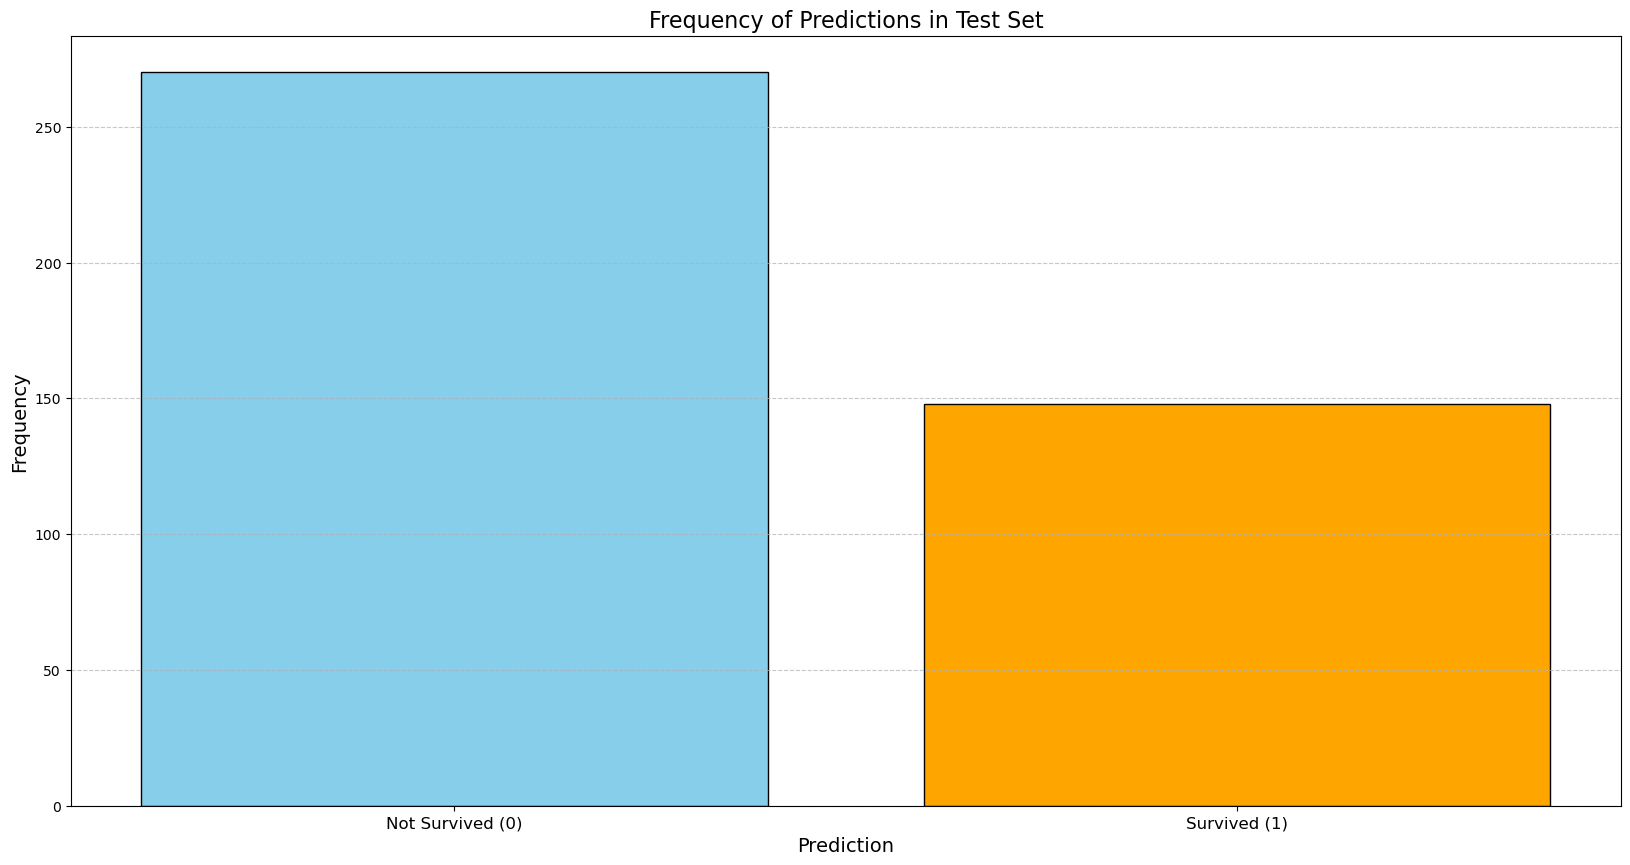

In [194]:
plt.figure(figsize=(20, 10))
plt.bar(prediction_counts.index, prediction_counts.values, color = ['skyblue', 'orange'], edgecolor = 'black')
plt.title('Frequency of Predictions in Test Set', fontsize=16)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([0, 1], labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Mapping the predictions to the PassengerIds in the test dataset

In [200]:
final_output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': test_pred})
final_output

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


Exporting the final output to CSV

In [202]:
final_output.to_csv('submission_saurabh_2.csv', index=False)